In [1]:
%load_ext autoreload 
%autoreload 2

In [48]:
from poly import *
import numpy as np
import matplotlib.pyplot as plt 
from functools import reduce
import matplotlib.animation as animation

plt.rcParams.update({'font.size': 16})
plt.style.use('bmh')

In [3]:
yk = np.array([1, 4, 9])
xk = np.array([1, 2, 3])
lp = Polynomial.lagrange_interpolator(xk, yk)

In [4]:
x_int = np.linspace(-0.1, 3.1)
y_int = np.array(list(map(lp.eval, x_int)))

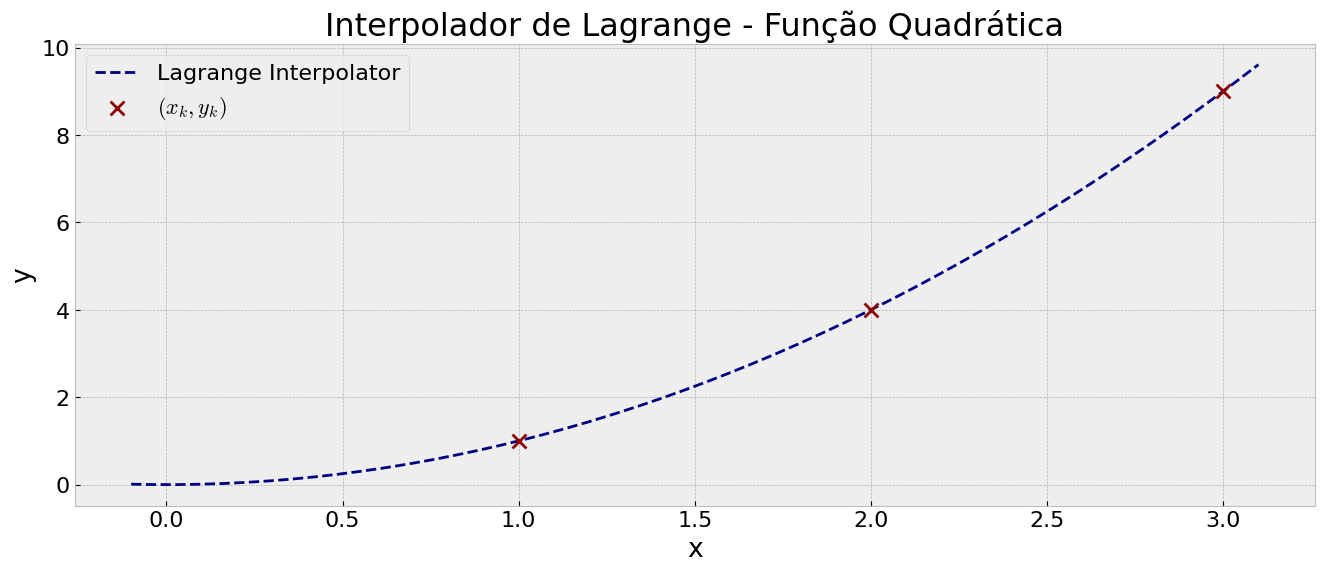

In [5]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.plot(x_int, y_int, color = "navy", linestyle = "--", label = "Lagrange Interpolator")
ax.scatter(xk, yk, marker = "x", zorder=100, label = r"$(x_k, y_k)$", s=100, color = "darkred")
ax.set_title("Interpolador de Lagrange - Função Quadrática" )
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()
plt.savefig("images/quadratic_lagrange.pdf")

### Fenômeno de Runge

In [22]:
xk = np.linspace(-2, 2, 9)
f = lambda x: 1/(1+4*x**2)
yk = np.array(list(map(f, xk)))

lp = Polynomial.lagrange_interpolator(xk, yk)

x_int = np.linspace(-2, 2, 1000)
y_lp = np.array(list(map(lp.eval, x_int)))

y_f = np.array(list(map(f, x_int)))

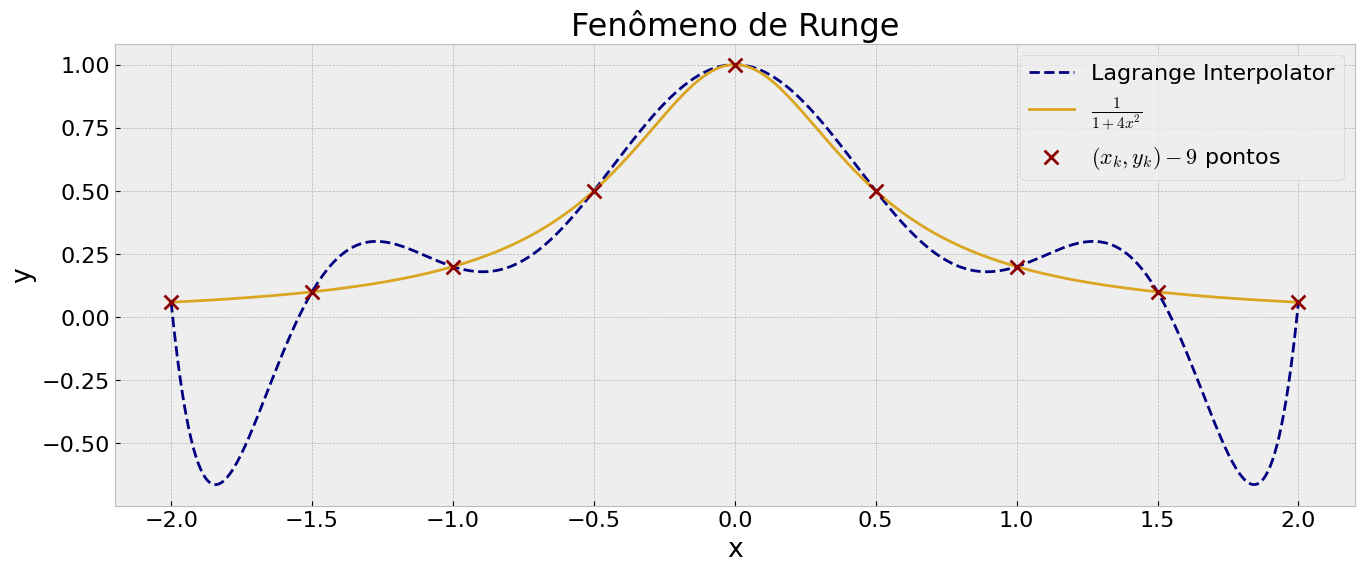

In [23]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.plot(x_int, y_lp, color = "navy", linestyle = "--", label = "Lagrange Interpolator")
ax.plot(x_int, y_f, color = "goldenrod", linestyle = "-", label = r"$\frac{1}{1+4x^2}$")
ax.scatter(xk, yk, marker = "x", zorder=100, label = r"$(x_k, y_k) - 9$ pontos", s=100, color = "darkred")
ax.set_title(r"Fenômeno de Runge" )
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()
plt.savefig("images/runge_phenomenon.pdf")

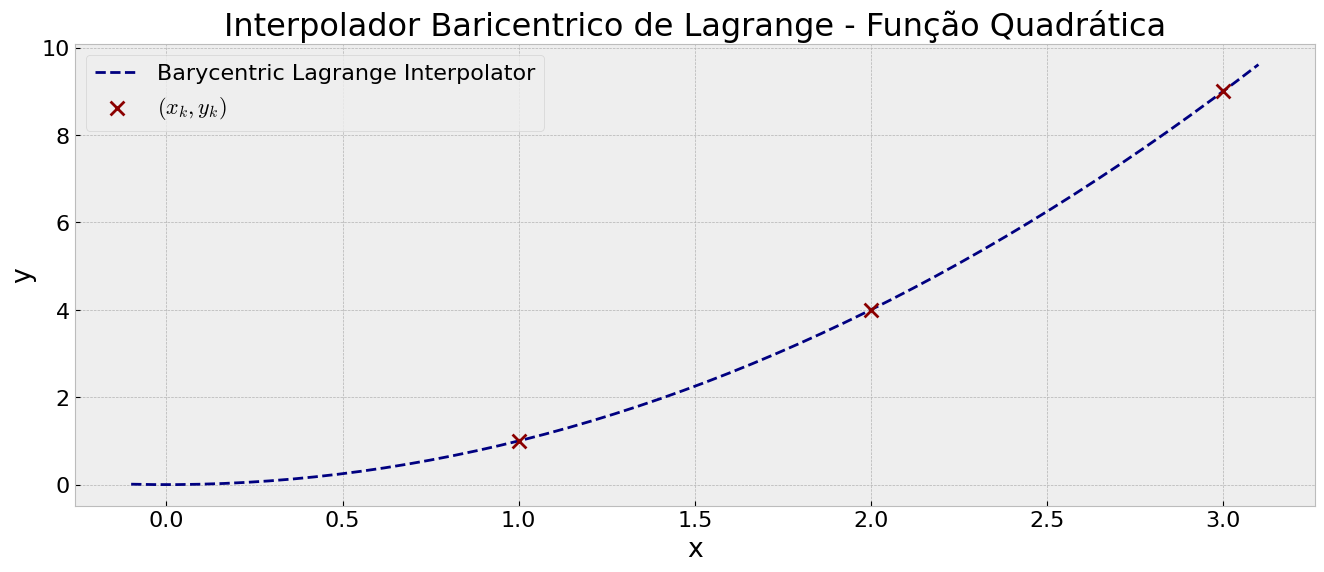

In [24]:
yk = np.array([1, 4, 9])
xk = np.array([1, 2, 3])
blinter = BarycentricLagrangeInterpolator(xk, yk)
x_int = np.linspace(-0.1, 3.1)
y_int = np.array(list(map(blinter.eval, x_int)))
fig, ax = plt.subplots(figsize = (16, 6))
ax.plot(x_int, y_int, color = "navy", linestyle = "--", label = "Barycentric Lagrange Interpolator")
ax.scatter(xk, yk, marker = "x", zorder=100, label = r"$(x_k, y_k)$", s=100, color = "darkred")
ax.set_title("Interpolador Baricentrico de Lagrange - Função Quadrática" )
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()
plt.savefig("images/baricentrico_lagrange.pdf")


In [25]:
n = 7
B = chebyshev_base_matrix(n)
BI = inverse_chebyshev_base_matrix(n)

In [26]:
I = B@BI
I[np.abs(I)< .1e-10]= 0 

In [27]:
I

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [28]:
n = 25
f = lambda x: np.exp(-x)*np.sin(np.pi*x)
x_lobatto = lobatto_points(n)
theta = np.linspace(0, np.pi, n+1)
f_x = np.array(list(map(f, x_lobatto)))

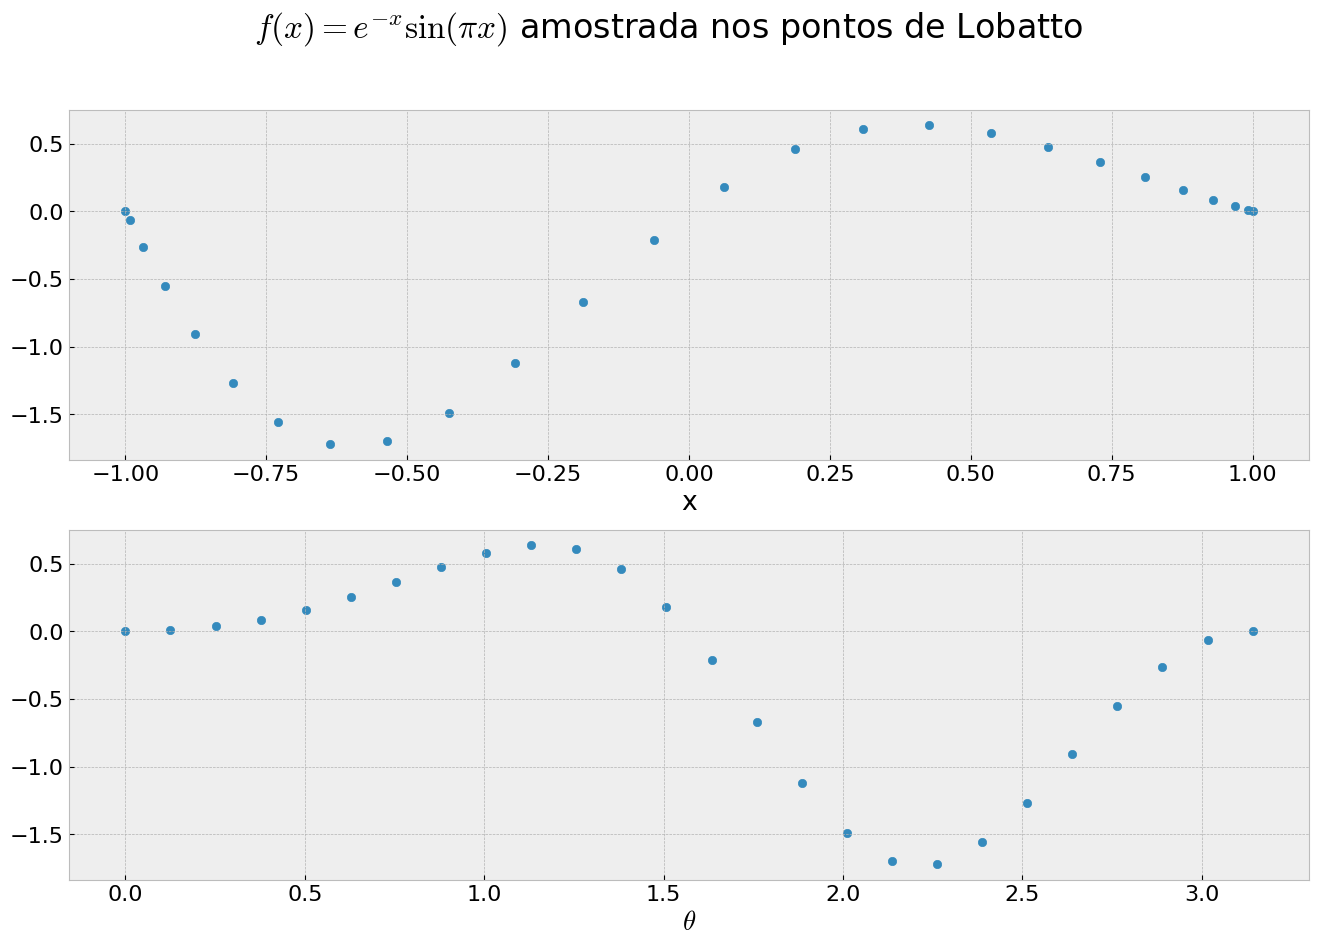

In [29]:
fig, ax = plt.subplots(2, 1, figsize = (16, 10), sharey = True)
ax[0].scatter(x_lobatto, f_x)
ax[0].set_xlabel("x")
ax[1].scatter(theta, f_x)
ax[1].set_xlabel(r"$\theta$")

fig.suptitle(r'$f(x) = e^{-x}\sin (\pi x)$ amostrada nos pontos de Lobatto', fontsize=24)
plt.savefig("images/cheb_mult_dom.pdf")

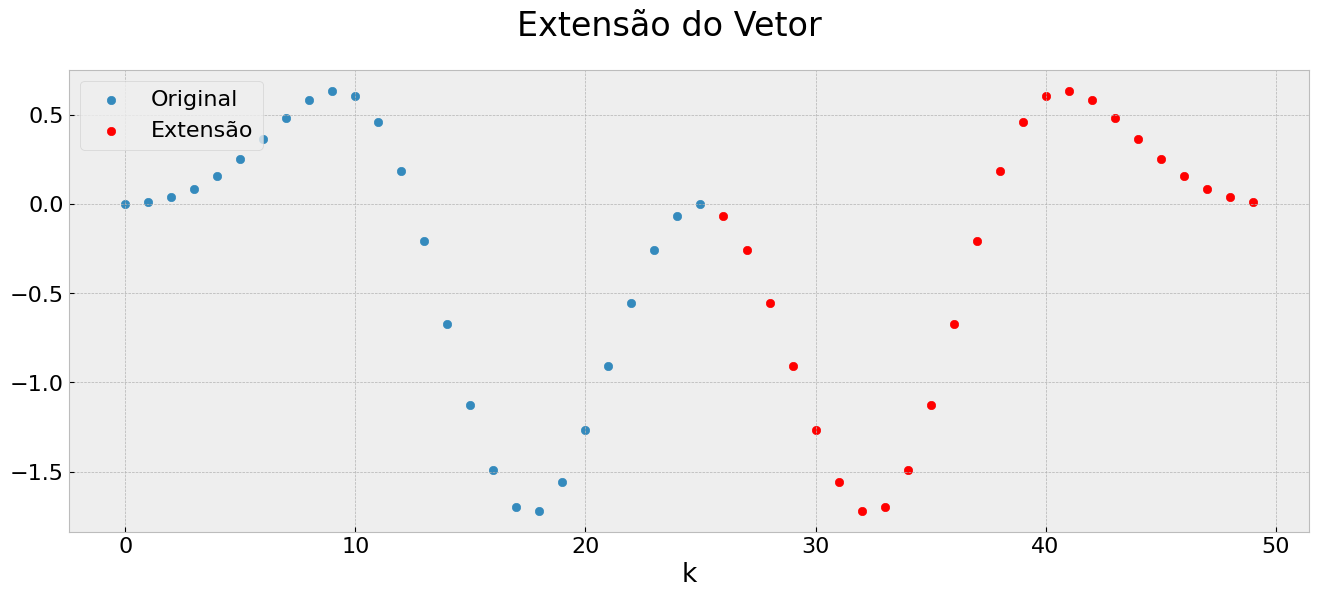

In [30]:
fig, ax = plt.subplots(figsize = (16, 6))
k2 = range(26, 50)
ext_f_x = np.flip(f_x)[1:-1]
k = range(0, 26)
ax.scatter(k, f_x, label ="Original")
ax.set_xlabel(r"k")
ax.set_xlabel(r"k")
fig.suptitle(r'Extensão do Vetor', fontsize=24)
ax.scatter(k2, ext_f_x, color='r', label = "Extensão")
plt.legend()
plt.savefig("images/cheb_fft.pdf")

In [31]:
coeff = chebyshev_coefficients(f_x)
polynomials = []

for i in range(coeff.size):
    polynomials.append(chebyshev_polynomial(i).scalar_mul(coeff[i]))

p = reduce(lambda x, y: x+y, polynomials)

In [32]:
x = np.linspace(-1, 1)
p_x = np.array(list(map(p.eval, x)))

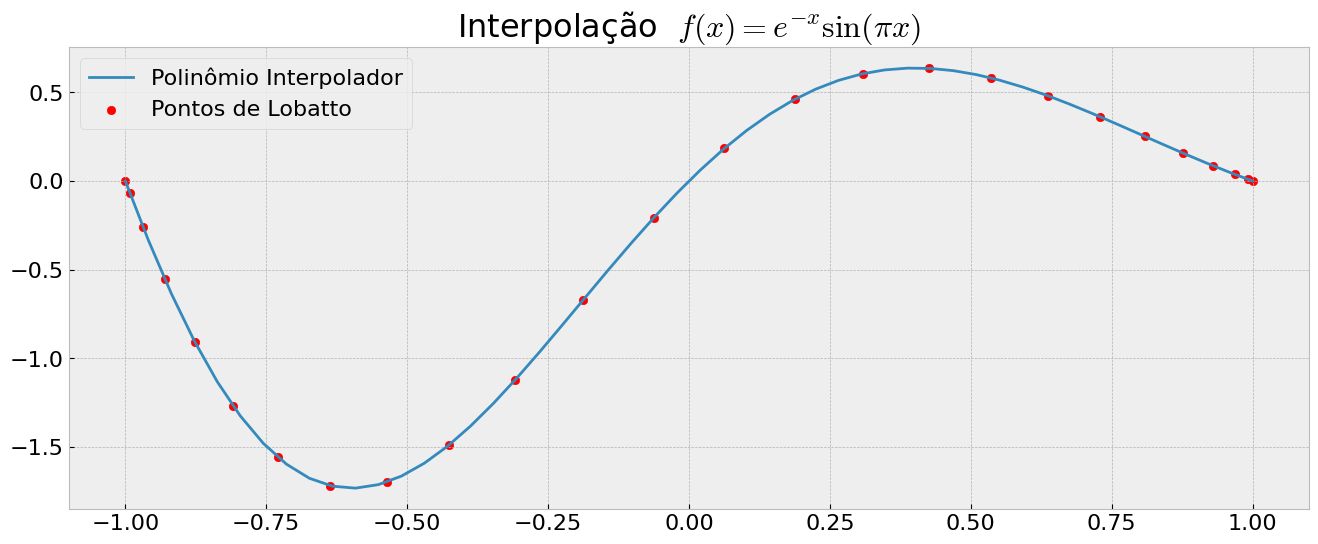

In [33]:
fig, ax  = plt.subplots(figsize=(16,6))
ax.plot(x, p_x, label = "Polinômio Interpolador")
ax.scatter(x_lobatto, f_x, color="r",label= "Pontos de Lobatto")
ax.set_title(r"Interpolação  $f(x) = e^{-x}\sin (\pi x)$")
plt.legend()
plt.savefig("images/cheb_result.pdf")

### Resolução de Equação Diferencial

In [34]:
n = 7
xv = lobatto_points(n)
D = generalized_diff_matrix(xv)
D2 = D@D 

D_tilde = D[1:-1, :]
D2_tilde = D2[1:-1, :]

P = np.diag(1/20*xv[1:-1]**2)
Q = np.diag(xv[1:-1])
zeros = np.zeros((n-1,1))
feye = np.hstack([zeros, np.eye(n-1), zeros])
f = (5*xv[1:-1]**5 - 1).reshape(-1, 1)
A = (P@D2_tilde+Q@D_tilde-feye)
A = np.vstack([np.zeros((1,n+1)), np.zeros((1,n+1)), A])
f = np.vstack([[0], [2], f])
A[0, 0] = 1
A[1, -1] = 1
y_res = np.linalg.solve(A, f)


In [35]:
p = Polynomial.lagrange_interpolator(xv, y_res)

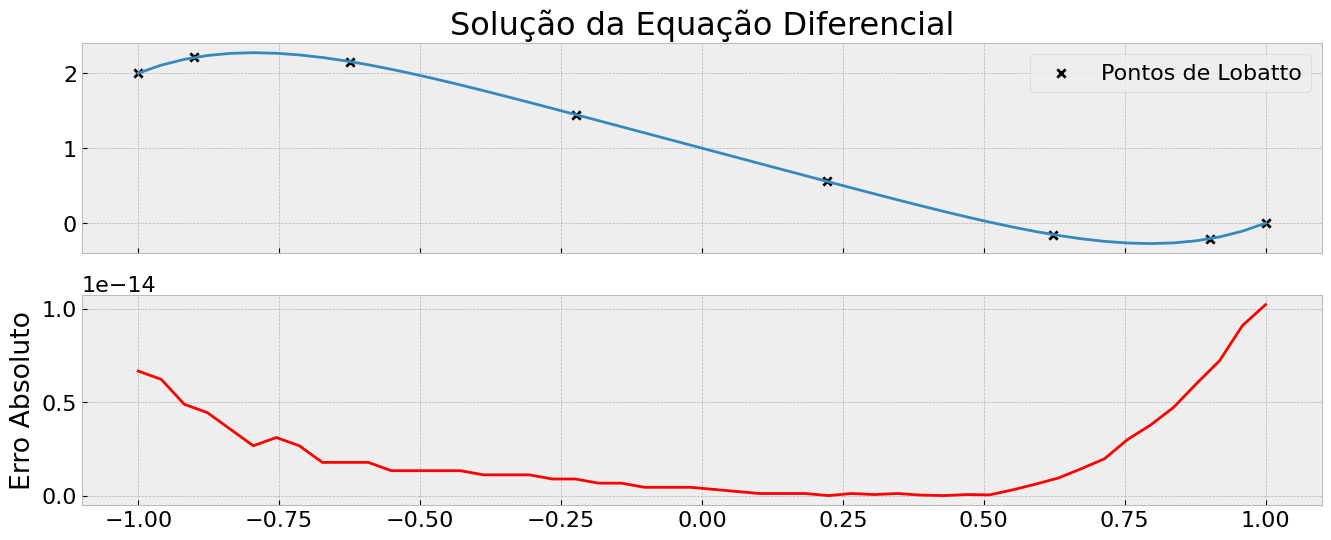

In [36]:
f = lambda x:  x**5 - 2*x +1
x_int = np.linspace(-1, 1)
y_hat = list(map(p.eval, x_int))
y = f(x_int)

fig, ax = plt.subplots(2, 1, figsize=(16,6), sharex=True)
ax[0].plot(x_int, y_hat)
ax[0].scatter(xv, y_res, label="Pontos de Lobatto", marker = "x", c="k")
ax[1].plot(x_int, np.abs(y-y_hat), color="r")
ax[1].set_ylabel("Erro Absoluto")
ax[0].set_title("Solução da Equação Diferencial")
ax[0].legend()
plt.savefig("images/eq_diff.pdf")

### Equação da Onda

In [96]:
N = 100
dt = 4/N**2
xs = lobatto_points(N+1)

D = generalized_diff_matrix(xs)
D2 = D@D
u = np.exp(-40*np.power((xs-0.4), 2))
u[0] = 0
u[-1] = 0
u_old = u

t = 0
k_max = int(np.round(4/dt))

list_u = [u]

for k in range(k_max):
    print(k)
    uxx = D2@u
    u_new = 2*u - u_old + (dt**2)*uxx
    u_old = u
    u = u_new
    t += dt
    u[0] = 0
    u[-1] = 0
    print(np.max(u))
    list_u.append(u)

0
0.9976285591498203
1
0.9976031406433876
2
0.997565014098439
3
0.9975141809721176
4
0.9974506432068152
5
0.9973744032301927
6
0.9972854639552954
7
0.9971838287805554
8
0.9970695015895374
9
0.9969424867504597
10
0.9968027891156739
11
0.9966504140212912
12
0.9964853672870018
13
0.9963076552159558
14
0.9961172845944998
15
0.9959142626916536
16
0.9956985972583938
17
0.9954702965269401
18
0.9952293692102177
19
0.9949758245015087
20
0.9947096720741343
21
0.9944309220809641
22
0.9941395851536626
23
0.9938356724017674
24
0.9935191954117998
25
0.9931901662465603
26
0.9928485974445875
27
0.9924945020196031
28
0.9921278934597512
29
0.9917487857265752
30
0.9913571932538563
31
0.9909531309465226
32
0.9905366141797586
33
0.990107658798263
34
0.9896662811154657
35
0.9892124979125243
36
0.9887463264370759
37
0.9882677844018919
38
0.9877768899836383
39
0.9872736618218426
40
0.9867581190179796
41
0.9862302811344753
42
0.9856901681934664
43
0.9851378006753231
44
0.9845731995171033
45
0.983996386111138
4

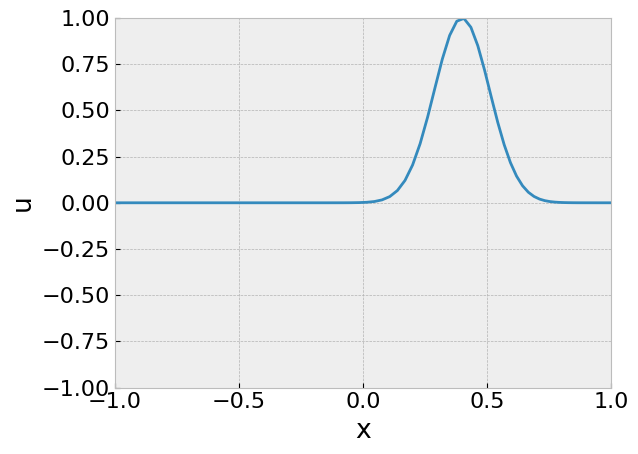

In [112]:
fig, ax = plt.subplots()

line2 = ax.plot(xs, list_u[0])[0]
ax.set(xlim=[-1, 1], ylim=[-1, 1], xlabel='x', ylabel='u')

def update(frame):
    # update the line plot:
    line2.set_xdata(xs)
    line2.set_ydata(list_u[frame])
    return  (line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=10001, interval=3)

ani.save("extremos_fixos.mp4")

In [117]:
N = 100
dt = 4/N**2
xs = lobatto_points(N+1)
D = generalized_diff_matrix(xs)
u = np.exp(-40*np.power((xs-0.4), 2))
u_old = u

t = 0
k_max = int(np.round(4/dt))

list_u = [u]

for k in range(k_max):
    ux = D@u
    ux[0] = 0
    ux[-1] = 0
    uxx = D@ux
    u_new = 2*u - u_old + (dt**2)*uxx
    u_old = u
    u = u_new
    t += dt
    list_u.append(u)

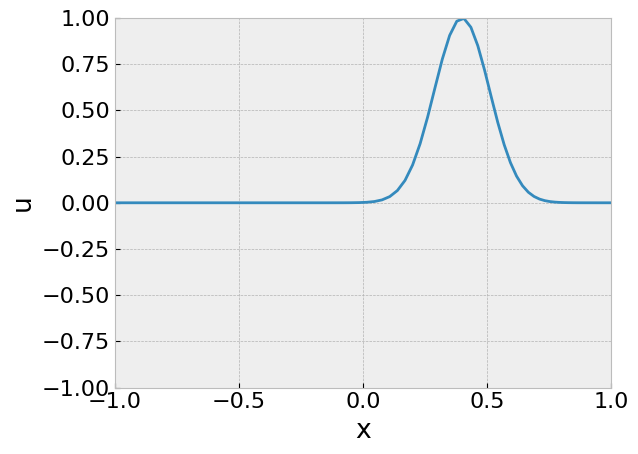

In [119]:
fig, ax = plt.subplots()

line2 = ax.plot(xs, list_u[0])[0]
ax.set(xlim=[-1, 1], ylim=[-1, 1], xlabel='x', ylabel='u')

def update(frame):
    # update the line plot:
    line2.set_xdata(xs)
    line2.set_ydata(list_u[frame])
    return  (line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=10001, interval=3)

ani.save("extremos_livres.mp4")

In [120]:
N = 100
dt = 4/N**2
xs = lobatto_points(N+1)
D = generalized_diff_matrix(xs)
u = np.exp(-40*np.power((xs-0.4), 2))
u[0] = 0
u_old = u
t = 0
k_max = int(np.round(4/dt))

list_u = [u]

for k in range(k_max):
    ux = D@u
    ux[-1] = 0
    uxx = D@ux
    u_new = 2*u - u_old + (dt**2)*uxx
    u_old = u
    u = u_new
    t += dt
    u[0] = 0
    list_u.append(u)

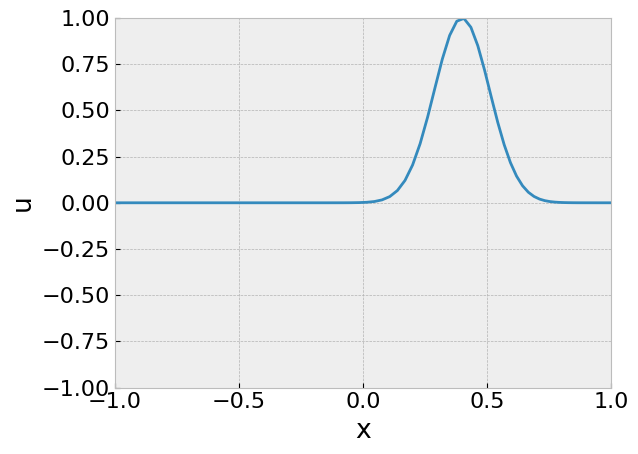

In [121]:
fig, ax = plt.subplots()

line2 = ax.plot(xs, list_u[0])[0]
ax.set(xlim=[-1, 1], ylim=[-1, 1], xlabel='x', ylabel='u')

def update(frame):
    # update the line plot:
    line2.set_xdata(xs)
    line2.set_ydata(list_u[frame])
    return  (line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=10001, interval=3)

ani.save("extremos_solto_livre.mp4")